In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
def apply_reductions(data, option="PCA"):

    if option == "PCA":
        my_pipeline = Pipeline([
            ("scale", StandardScaler()),
            ("pca", PCA(n_components=2, random_state=42))
        ])
        return my_pipeline.fit_transform(data)
    
    elif option == "t-SNE":
        tsne_instance = TSNE(n_components=2,random_state=42)
        return tsne_instance.fit_transform(data)
    
    else:
        umap_instance = umap.UMAP(n_components=2, random_state=42)
        return umap_instance.fit_transform(data)

In [7]:
df_embeddings = pd.read_csv("../../processed_data/data_with_embedding.csv")
df_values = df_embeddings.drop(columns=["label"])

In [14]:
df_pca = apply_reductions(df_values.values, "PCA")
df_pca = pd.DataFrame(data=df_pca, columns=["PCA-1", "PCA-2"])
df_pca["label"] = df_embeddings["label"]

In [12]:
df_tsne = apply_reductions(df_values.values, "t-SNE")
df_tsne = pd.DataFrame(data=df_tsne, columns=["t-SNE 1", "t-SNE 2"])
df_tsne["label"] = df_embeddings["label"]

In [13]:
df_umap = apply_reductions(df_values.values, "UMAP")
df_umap = pd.DataFrame(data=df_umap, columns=["UMAP 1", "UMAP 2"])
df_umap["label"] = df_embeddings["label"]

/home/david/miniconda3/envs/machine_learning_2025/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


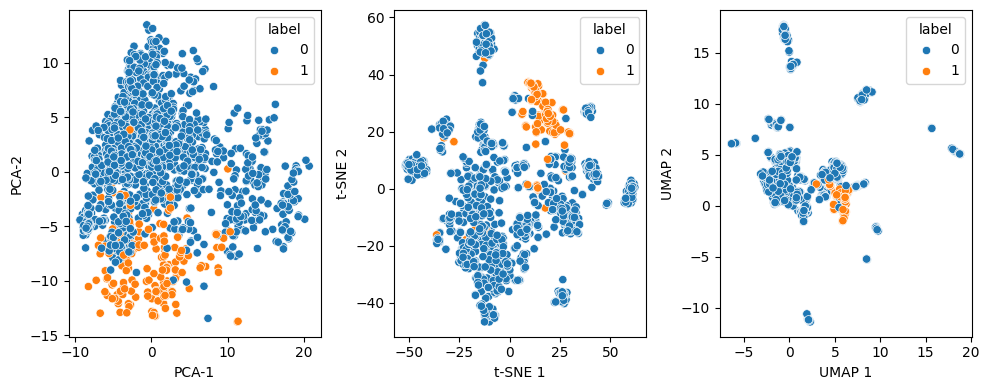

In [15]:
_, axis = plt.subplots(1,3, figsize=(10,4))

sns.scatterplot(data=df_pca, x="PCA-1", y="PCA-2", hue="label", ax=axis[0])
sns.scatterplot(data=df_tsne, x="t-SNE 1", y="t-SNE 2", hue="label", ax=axis[1])
sns.scatterplot(data=df_umap, x="UMAP 1", y="UMAP 2", hue="label", ax=axis[2])

plt.tight_layout()